In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [5]:
df.sort_values(by='Chirps/Second')

,Chirps/Second,Ground Temperature
14,14.4,76.3
6,14.7,69.7
10,15.0,79.6
8,15.4,69.4
5,15.5,75.2
7,15.7,71.6
1,16.0,71.6
12,16.0,80.6
9,16.3,83.3
13,17.0,83.5


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

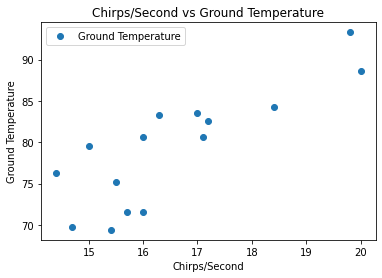

In [6]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [7]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [8]:
X = df.iloc[:, :-1].values # features as arrays
y = df.iloc[:, 1].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [9]:
X_train.shape, X_test.shape

((12, 1), (3, 1))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #initialising
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [11]:
X_train,X_test

(array([[ 0.49444579],
        [-0.49444579],
        [-0.56037189],
        [ 2.34037674],
        [-0.16481526],
        [-1.21963295],
        [ 0.56037189],
        [-0.36259358],
        [-0.82407632],
        [-0.16481526],
        [ 1.41741126],
        [-1.02185463]]),
 array([[0.03296305],
        [0.626298  ],
        [2.47222895]]))

In [12]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [16]:
print("Intercept is ",regressor.intercept_)
print("Coefficient is ",regressor.coef_[0]) 

Intercept is  77.97500000000001
Coefficient is  5.608388715115798


In [17]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([78.15986961, 81.48752264, 91.84022093])

In [18]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,83.3,78.159870
1,82.6,81.487523
2,88.6,91.840221


In [19]:
regressor.predict(scaler.transform([[18]])) #intrapolate

array([84.44543644])

Extrapolate

In [32]:
X = df.iloc[:, 1].values # features as arrays
y = df.iloc[:, :-1].values # target as arrays
X=X.reshape(-1,1)
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [44]:
X,y

(array([[88.6],
        [71.6],
        [93.3],
        [84.3],
        [80.6],
        [75.2],
        [69.7],
        [71.6],
        [69.4],
        [83.3],
        [79.6],
        [82.6],
        [80.6],
        [83.5],
        [76.3]]),
 array([[20. ],
        [16. ],
        [19.8],
        [18.4],
        [17.1],
        [15.5],
        [14.7],
        [15.7],
        [15.4],
        [16.3],
        [15. ],
        [17.2],
        [16. ],
        [17. ],
        [14.4]]))

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #initialising
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [34]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [35]:
print("Intercept is ",regressor.intercept_)
print("Coefficient is ",regressor.coef_[0]) 

Intercept is  [16.25]
Coefficient is  [1.25022798]


In [36]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([[17.22840205],
       [17.09978582],
       [18.20221066]])

In [39]:
regressor.predict(scaler.transform([[95]])) #extrapolate

array([[19.3781305]])

In [40]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.9421351895764806
Mean Squared Error: 1.36800658275455
R2- SCORE: 0.4488782791051499


In [42]:
y_test,y_pred

(array([[16.3],
        [17.2],
        [20. ]]),
 array([[17.22840205],
        [17.09978582],
        [18.20221066]]))

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [45]:
df = pd.read_fwf("/Users/pavitrank/Downloads/brain_body.txt")

In [47]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [48]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


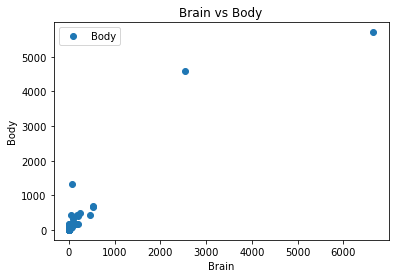

In [51]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [54]:
df.sort_values(by='Brain').tail()

,Brain,Body
3,465.0,423.0
21,521.0,655.0
27,529.0,680.0
18,2547.0,4603.0
32,6654.0,5712.0


In [57]:
df=df.drop([32,18])

In [58]:
df.describe()

,Brain,Body
count,60.000000,60.000000
mean,52.066317,120.655333
std,119.468888,228.212145
min,0.005000,0.140000
25%,0.532500,3.975000
50%,3.150000,16.250000
75%,35.332500,128.875000
max,529.000000,1320.000000


In [88]:
X = df['Brain'].values # features as arrays
y = df['Body'].values # target as arrays
X=X.reshape(-1,1)
y=y.reshape(-1,1)
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 777)

In [79]:
X

array([[3.385e+00],
       [4.800e-01],
       [1.350e+00],
       [4.650e+02],
       [3.633e+01],
       [2.766e+01],
       [1.483e+01],
       [1.040e+00],
       [4.190e+00],
       [4.250e-01],
       [1.010e-01],
       [9.200e-01],
       [1.000e+00],
       [5.000e-03],
       [6.000e-02],
       [3.500e+00],
       [2.000e+00],
       [1.700e+00],
       [2.300e-02],
       [1.871e+02],
       [5.210e+02],
       [7.850e-01],
       [1.000e+01],
       [3.300e+00],
       [2.000e-01],
       [1.410e+00],
       [5.290e+02],
       [2.070e+02],
       [8.500e+01],
       [7.500e-01],
       [6.200e+01],
       [3.500e+00],
       [6.800e+00],
       [3.500e+01],
       [4.050e+00],
       [1.200e-01],
       [2.300e-02],
       [1.000e-02],
       [1.400e+00],
       [2.500e+02],
       [2.500e+00],
       [5.550e+01],
       [1.000e+02],
       [5.216e+01],
       [1.055e+01],
       [5.500e-01],
       [6.000e+01],
       [3.600e+00],
       [4.288e+00],
       [2.800e-01],


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #initialising
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)

LinearRegression()

In [91]:
print(regressor.intercept_)
print(regressor.coef_)

[125.04]
[[139.50058353]]


In [92]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([[ 64.83706823],
       [107.38366718],
       [307.97874331],
       [ 76.14449768],
       [ 62.79789791],
       [ 63.66799502],
       [ 62.69440618],
       [ 63.20803179],
       [ 75.44177608],
       [738.55543537],
       [ 63.94269528],
       [ 62.76084531]])

In [93]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 66.48670931801384
Mean Squared Error: 4963.589359166507
R2- SCORE: 0.856795095347168


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [94]:
df = pd.read_fwf("/Users/pavitrank/Downloads/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [97]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [98]:
import seaborn as sns

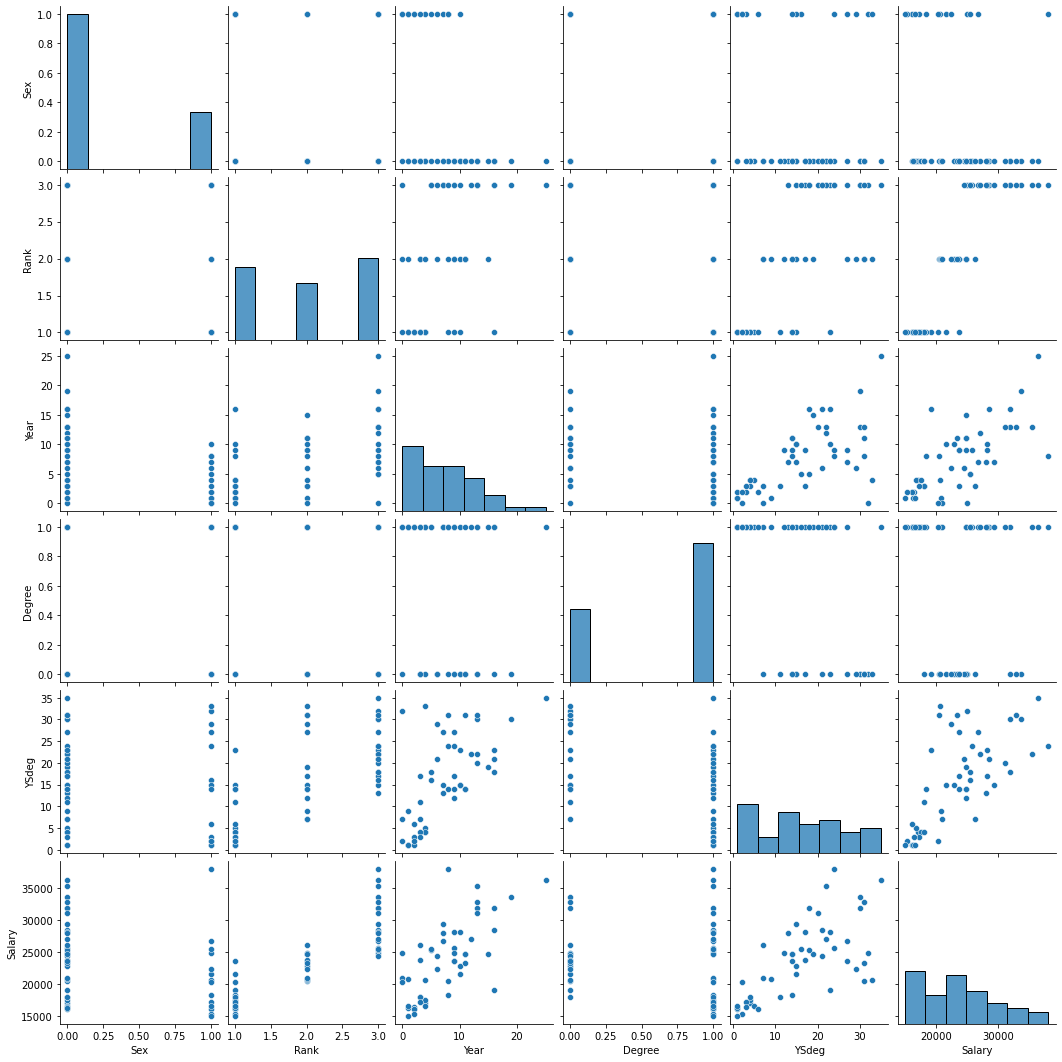

In [99]:
sns.pairplot(df)

In [100]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [101]:
X=df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]
y=df['Salary']

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lm=LinearRegression()

In [106]:
lm.fit(X_train,y_train)

LinearRegression()

In [107]:
print(lm.intercept_)

11378.108092561686


In [108]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Sex,1129.720188
Rank,5690.926823
Year,460.695745
Degree,-1590.803259
YSdeg,-117.338120


Sex is the second most deciding factor determining the salary

In [109]:
predictions = lm.predict(X_test)

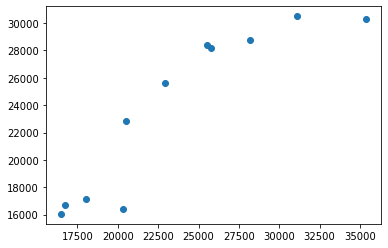

In [111]:
plt.scatter(y_test,predictions)

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2- SCORE:', metrics.r2_score(y_test,predictions))

MAE: 1987.0221498148521
MSE: 6348227.42713146
RMSE: 2519.5688970797087
R2- SCORE: 0.8132741491106202
